In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

In [26]:
def tidy_abortion_df():
    """
    Create dataframe with variables relevant for all hypotheses concerning abortion
    """
    
    # load data
    df = pd.read_stata('data/data.dta', convert_categoricals = False)
    # choose relevant columns / variables  
    abortion_df = df[["sex", "age", "J005", "rd01", "J029"]]
    # remove all values below 0 of abortion response, as negative values indicate not apllicable
    abortion_df = abortion_df[(abortion_df.J005 > 0)]
    # rename columns
    abortion_df = abortion_df. rename(columns = {"J005": "response to abortion", "rd01": "denomination", "J029": "religious assessment"})
    # rename values 
    abortion_df = abortion_df.replace({"sex": {1: "male", 2: "female"},
                                      "denomination": {1: "protestant church (w.o. free church)", 2: "protestant church", 3: "roman catholic church", 4: "other christian religious group", 5: "other non christian religious group", 6: "no religious group", -9: np.nan, -7: np.nan},
                                      "religious assessment": {1: "deeply religious", 2: "very religious", 3: "rather religious", 4: "neither nor", 5: "rather not religious", 6: "not religious", 7: "not religious at all", -13: np.nan, -12: np.nan, -9: np.nan, -8: np.nan}})  
    
    return abortion_df

In [38]:
def tidy_abortion_summary():
    
    print("\nFull Dataframe: \n\n", tidy_abortion_df())
    # summary statistic
    print("\nSummary statistic: \n\n", tidy_abortion_df().describe(include='all'))   
    
    return 

In [41]:
# could still add mean and max response of males and females to summarizing df 
# test still missing
def abortion_sex():
    """
    Check for correlation between sex and response to abortion by counting responses
    of males and females and plotting the percentage
    """
    abortion_df = tidy_abortion_df()
    abse_df = abortion_df[["sex", "response to abortion"]]
        
    # group_by
    abse_group_df = abse_df.groupby(["sex","response to abortion"]).value_counts().reset_index()
    abse_group_df = abse_group_df.rename(columns = {0:"counts"})
    
    quantity = abse_df["sex"].value_counts()
    quantity_males = np.asarray(quantity)[0]
    quantity_females = np.asarray(quantity)[1]
    
    females_df = abse_group_df[:4]
    males_df = abse_group_df[4:]
    
    males_df["percentage"] = males_df["counts"]/quantity_males
    females_df["percentage"] = females_df["counts"]/quantity_females
    
    males_percentage = males_df["percentage"].to_numpy()
    females_percentage = females_df["percentage"].to_numpy()
    
    values = males_df["response to abortion"].to_numpy()
    
    abse_group_df = pd.concat([females_df, males_df])
    print("\n Grouped Dataframe for: \n\n",abse_group_df, "\n")
    
    # line plot for response to abortion of males and females in percentage 
    plt.plot(values, males_percentage, 'o-g')
    plt.plot(values, females_percentage, 'o-b')
    plt.legend(['males', 'females'])
    
    return 


Full Dataframe: 

          sex  age  response to abortion                          denomination  \
1     female   64                     4                    no religious group   
5       male   41                     1  protestant church (w.o. free church)   
10      male   37                     4                    no religious group   
11    female   77                     3                 roman catholic church   
13      male   46                     4                    no religious group   
...      ...  ...                   ...                                   ...   
3467  female   60                     3  protestant church (w.o. free church)   
3468  female   69                     4                    no religious group   
3471  female   43                     1                    no religious group   
3472  female   32                     1                    no religious group   
3476    male   88                     3                    no religious group   

      r

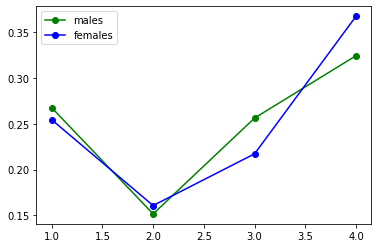

In [42]:
tidy_abortion_summary()
abortion_sex()